# 팰린드롬?
- https://www.acmicpc.net/problem/10942

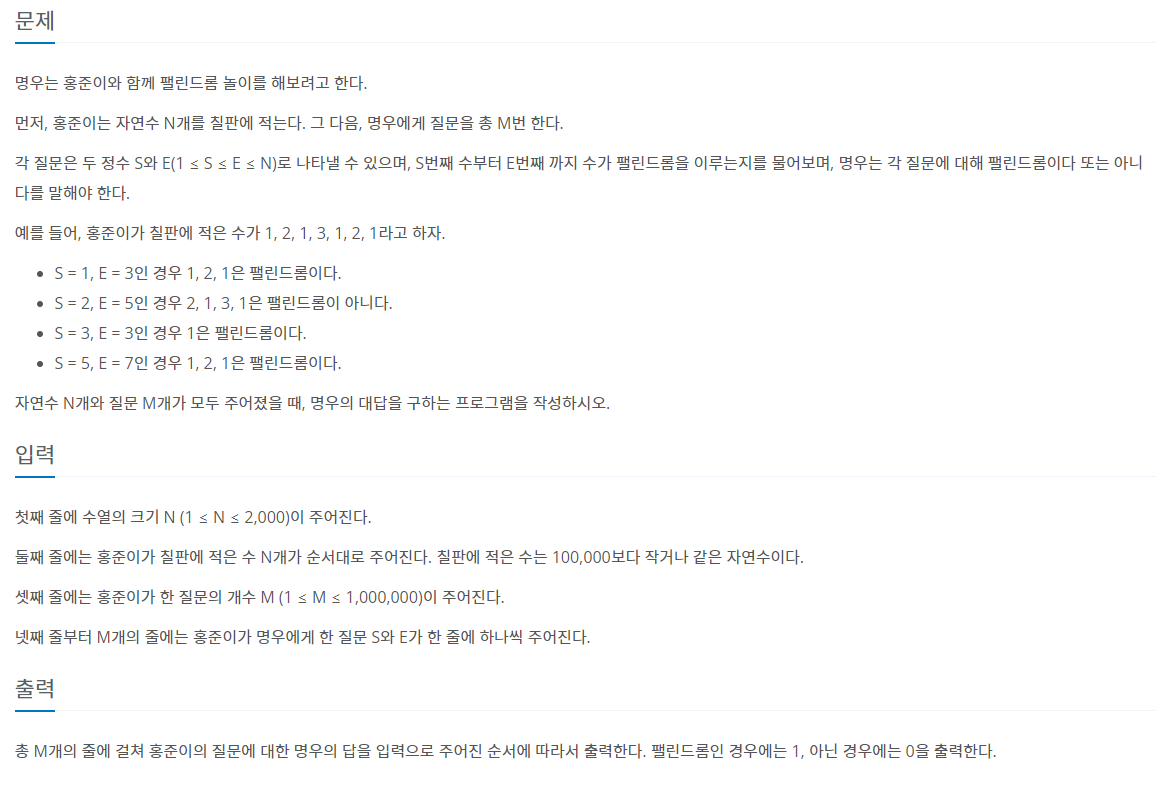

In [210]:
# 시간초과
import sys
input = sys.stdin.readline
n = int(input())
arr = list(map(int, input().split()))

# 질문의 수
m = int(input())

dp = [[0] * (n+1) for _ in range(n+1)]

for i in range(1, n+1):
    for j in range(i, n+1):
        if arr[i-1:j] == [*reversed(arr[i-1:j])]:
            dp[i][j] = dp[j][i] = 1

for k in range(m):
    s, e = map(int, input().split())
    print(dp[s][e])

7
1 2 1 3 1 2 1
4
1 3
1
2 5
0
3 3
1
5 7
1


- 글자가 1개인 부분 문자열은 무조건 팰린드롬이다.
- 글자가 2개인 부분 문자열은 2개의 글자가 같다면 팰린드롬이다.
- 글자가 3개이상이면 시작 문자열과 끝 문자열이 같고 그 사이의 문자열이 팰린드롬이다.

In [211]:
# 클린코드
# import sys
# input = sys.stdin.readline

n = int(input())
numbers = list(map(int, input().split()))
m = int(input())

#dp
dp = [[0] * n for _ in range(n)]


for num_len in range(n):
    for start in range(n - num_len):
        end = start + num_len
        
        # 시작점과 끝점이 같다면 글자수가 1개이므로 무조건 팰린드롬
        if start == end:
            dp[start][end] = 1
        # 시작점의 글자와 끝점의 글자가 같다면
        elif numbers[start] == numbers[end]:
            # 두 글자짜리 문자열이라면 무조건 팰린드롬
            if start + 1 == end: 
                dp[start][end] = 1
            # 가운데 문자열이 팰린드롬이라면 팰린드롬
            elif dp[start+1][end-1] == 1: 
                dp[start][end] = 1
            

#정답출력하기
for question in range(m):
    s, e = map(int, input().split())
    print(dp[s-1][e-1])

7
1 2 1 3 1 2 1
4
1 3
1
2 5
0
3 3
1
5 7
1


# 동물원
- https://www.acmicpc.net/problem/1309

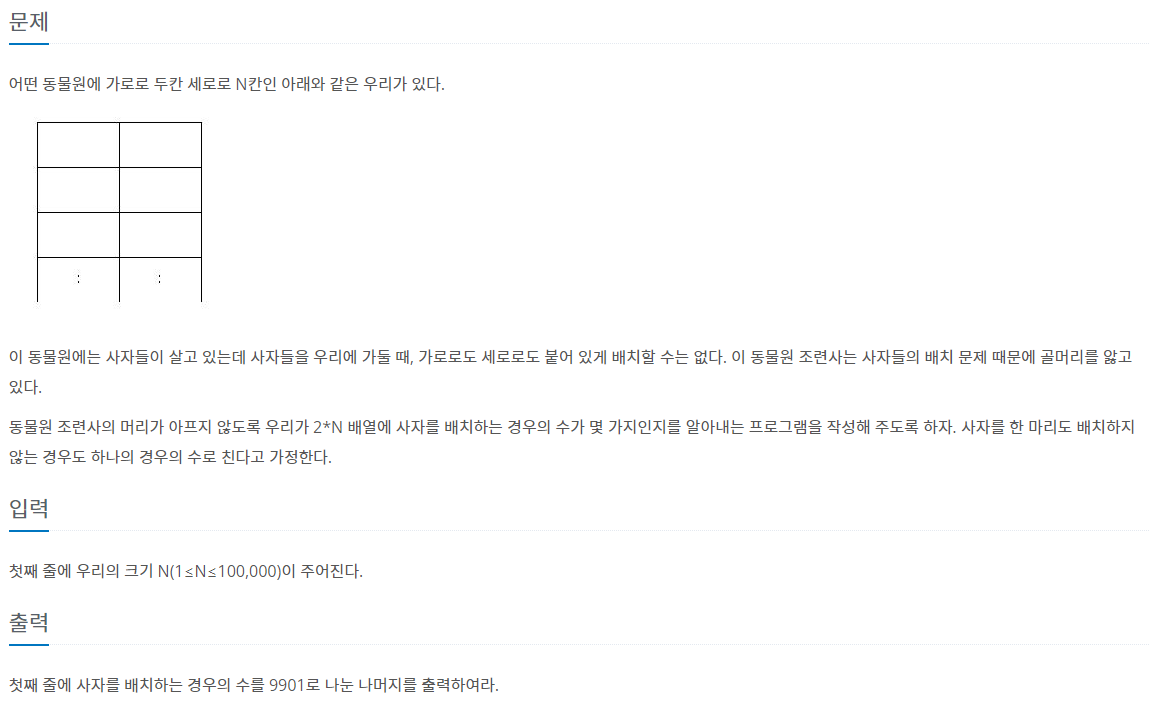

<b>n번째 줄에 올 수 있는 경우</b>
1. 한 마리도 배치하지 않는 경우: $dp_{i-1}$
2. 왼쪽 칸에만 배치하는 경우 + 오른쪽 칸에만 배치하는 경우: $dp_{i-1} + dp_{i-2}$

$ dp_i = dp_{i-1} * 2 + dp_{i-2} $의 경우의 수

dp[i]를 구할 때마다 %9901를 실행해 넣어줘야 한다
- 프린트할 때 %9901을 실행하면 메모리초과 발생함. 
- dp[i] 값을 입력하는 과정에서 오버플로우가 발생하기 때문

In [13]:
n = int(input())

dp = [1] * (n+1)
dp[1] = 3

for i in range(2, n+1):
    dp[i] = (dp[i-1] * 2) + dp[i-2]
    dp[i] %= 9901
    
print(dp[n])

4
41


# 앱
- https://www.acmicpc.net/problem/7579

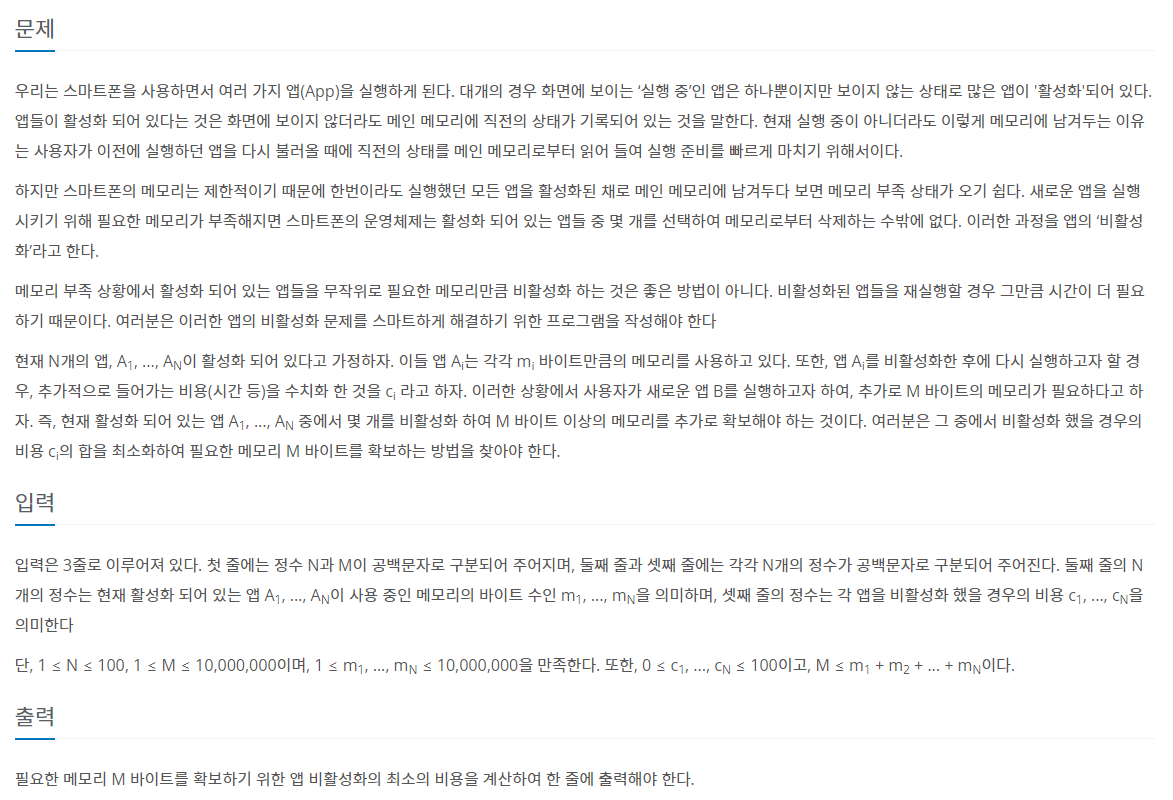

In [51]:
# 앱의 개수, 새로운 앱을 실행하기 위해 필요한 메모리
n, m = map(int, input().split())

# 현재 활성화 되어 있는 앱이 사용 중인 메모리
a = list(map(int, input().split()))

# 각 앱을 비활성화 했을 경우의 비용
c = list(map(int, input().split()))

dp = [[0] * (sum(c)+1) for _ in range(n+1)]

result = sum(c) # 비용

for i in range(1, n+1):
    memory = a[i-1]
    cost = c[i-1]
    for j in range(1, sum(c)+1):
        if j < cost:
            dp[i][j] = dp[i-1][j] # 이전 값 그대로
        else:
            dp[i][j] = max(dp[i-1][j], dp[i-1][j-cost] + memory)
        
        if dp[i][j] >= m:
            result = min(result, j)
            
print(result)

5 60
30 10 20 35 40
3 0 3 5 4
